<a href="https://colab.research.google.com/github/asheta66/Data-Science/blob/main/Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

# Load the heart disease dataset (assuming it's in a CSV file)
data = pd.read_csv('heart_disease.csv')

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [51]:
# Describe the data with custom formatting
description = data.describe().applymap(lambda x: f'{x:.3f}')
description

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000
mean,54.434,0.696,0.942,131.612,246.000,0.149,0.530,149.114,0.337,1.072,1.385,0.754,2.324,0.513
std,9.072,0.460,1.030,17.517,51.593,0.357,0.528,23.006,0.473,1.175,0.618,1.031,0.621,0.500
min,29.000,0.000,0.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,48.000,0.000,0.000,120.000,211.000,0.000,0.000,132.000,0.000,0.000,1.000,0.000,2.000,0.000
50%,56.000,1.000,1.000,130.000,240.000,0.000,1.000,152.000,0.000,0.800,1.000,0.000,2.000,1.000
75%,61.000,1.000,2.000,140.000,275.000,0.000,1.000,166.000,1.000,1.800,2.000,1.000,3.000,1.000
max,77.000,1.000,3.000,200.000,564.000,1.000,2.000,202.000,1.000,6.200,2.000,4.000,3.000,1.000


In [52]:
# Rename the 'COPD' column to 'target'
# data = data.rename(columns={'COPD': 'target'})

In [53]:
# Split the data into features (X) and target (y)
X = data.drop('target', axis=1)
Y = data['target']

# Split the d ata into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

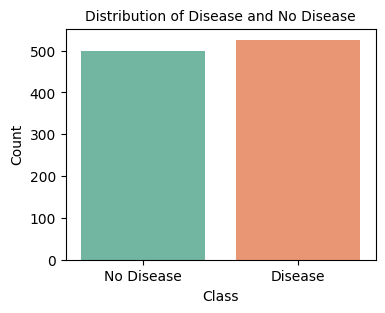

In [54]:
import seaborn as sns

# Map class labels to human-readable labels
class_labels = {0: 'No Disease', 1: 'Disease'}
data['target_label'] = data['target'].map(class_labels)

# Create a countplot with custom labels
plt.figure(figsize=(4, 3))
sns.countplot(data=data, x='target_label', palette='Set2')

# Set plot labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Disease and No Disease', fontsize=10)

# Save the countplot to a file (e.g., PNG format)
plt.savefig('classes.png', dpi=300, bbox_inches='tight')

# Display the countplot
plt.show()


**Feature Selection using SelectBest**

In [55]:
# Feature selection using SelectKBest and F-test
selector = SelectKBest(f_classif, k=5)
X_train_selected = selector.fit_transform(X_train, Y_train)
X_test_selected = selector.transform(X_test)

# Access the feature names selected by SelectKBest
selected_feature_names = X.columns[selector.get_support()]

# Print the selected feature names
print("Selected Feature Names:", selected_feature_names)

Selected Feature Names: Index(['cp', 'thalach', 'exang', 'oldpeak', 'ca'], dtype='object')


**Showing the Correlation Matrix**

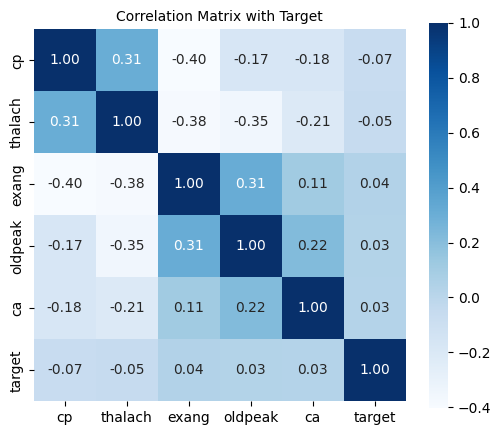

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already selected features and have 'X_train_selected' and 'X_test_selected'
# Access the feature names selected by SelectKBest
selected_feature_names = X.columns[selector.get_support()]

# Create DataFrames with selected features
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_feature_names)
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_feature_names)

# Concatenate the training and testing DataFrames for selected features
selected_features_df = pd.concat([X_train_selected_df, X_test_selected_df], axis=0)

# Include the 'target' column in the selected features DataFrame
selected_features_df['target'] = Y

# Calculate the correlation matrix, including the 'target' column
corr_matrix = selected_features_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", square=True)

# Set plot title
plt.title('Correlation Matrix with Target', fontsize=10)

# Save the correlation matrix
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


In [57]:
# Feature scaling using StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train_selected)
X_test_scaled = sc.transform(X_test_selected)

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define a range of tree depths to search
param_grid = {'max_depth': [2, 3]}

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=12)

# Perform a grid search with cross-validation
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, Y_train)

# Get the best tree depth from the grid search
best_max_depth = grid_search.best_params_['max_depth']
print("Best Max Depth:", best_max_depth)

# Train a decision tree classifier with the best depth
best_dt_classifier = DecisionTreeClassifier(max_depth=best_max_depth, random_state=12)
best_dt_classifier.fit(X_train_scaled, Y_train)


Best Max Depth: 3


DecisionTreeClassifier(max_depth=3, random_state=12)

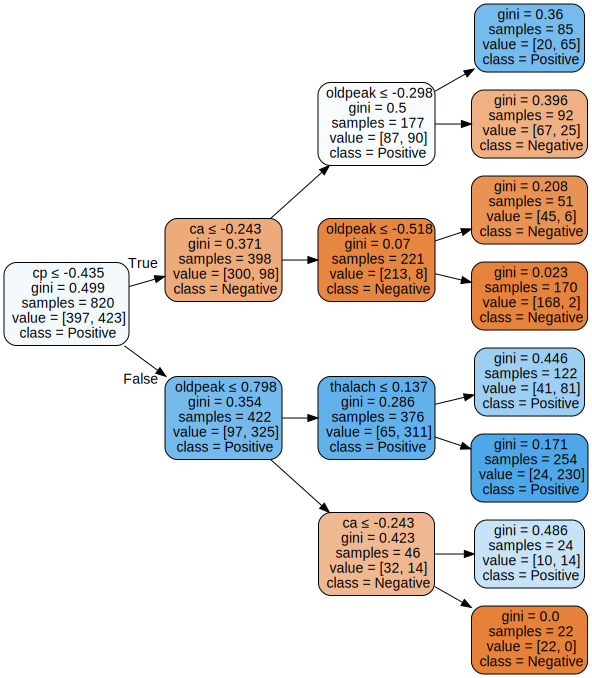

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz


# Export the tree as a Graphviz dot file
dot_data = export_graphviz(best_dt_classifier, out_file=None, feature_names=selected_feature_names,
                           class_names=['Negative', 'Positive'], filled=True, rounded=True,
                           special_characters=True, rotate=True)

# Create a graph from the dot file
graph = graphviz.Source(dot_data)

# Render the graph as a PNG image
graph.format = 'png'
graph.render('decision tree', view=False)

# Display the graph
graph

In [60]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have a model named 'model' and test data 'X_test' and corresponding true labels 'y_true'
y_train_pred = best_dt_classifier.predict(X_train_scaled)
y_test_pred = best_dt_classifier.predict(X_test_scaled)

# Calculate the metrics in the training case
train_accuracy = accuracy_score(Y_train, y_train_pred)
train_precision = precision_score(Y_train, y_train_pred)
train_recall = recall_score(Y_train, y_train_pred)
train_f1 = f1_score(Y_train, y_train_pred)

# Calculate the metrics in the testing case
test_accuracy = accuracy_score(Y_test, y_test_pred)
test_precision = precision_score(Y_test, y_test_pred)
test_recall = recall_score(Y_test, y_test_pred)
test_f1 = f1_score(Y_test, y_test_pred)

# Calculate specificity for testing
tn, fp, fn, tp = confusion_matrix(Y_test, y_test_pred).ravel()
# test_specificity = tn / (tn + fp)

# Create a DataFrame
results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Training': [train_accuracy, train_precision, train_recall, train_f1],
    'Testing': [test_accuracy, test_precision, test_recall, test_f1]
})

# Display the DataFrame
results_df.T

,0,1,2,3
Metric,Accuracy,Precision,Recall,F1 Score
Training,0.843902,0.804124,0.921986,0.859031
Testing,0.780488,0.745763,0.854369,0.79638


In [61]:
# Calculate the confusion matrices for training and testing
cm_train = confusion_matrix(Y_train, y_train_pred)
cm_test = confusion_matrix(Y_test, y_test_pred)

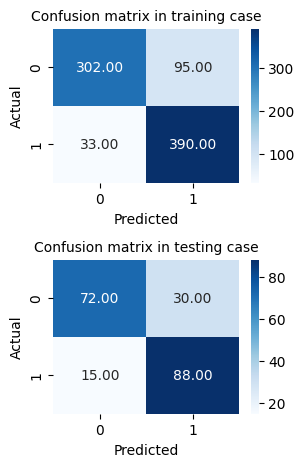

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(3, 5))

plt.subplot(2, 1, 1)
sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='.2f')
plt.title('Confusion matrix in training case', fontsize=10)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Add space between subplots
plt.subplots_adjust(hspace=0.5)  # You can adjust the value as needed

plt.subplot(2, 1, 2)
sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='.2f')
plt.title('Confusion matrix in testing case', fontsize=10)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the plot as "confusion.png"
plt.savefig('confusion.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


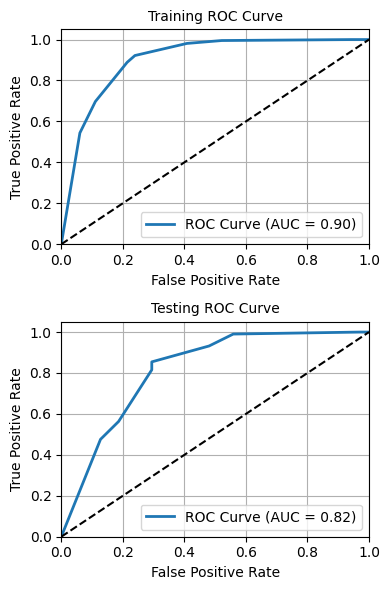

In [63]:
from sklearn.metrics import auc, roc_curve

# Calculate and plot the ROC curve for training data
y_train_prob = best_dt_classifier.predict_proba(X_train_scaled)[:, 1]
fpr_train, tpr_train, _ = roc_curve(Y_train, y_train_prob)
roc_auc_train = auc(fpr_train, tpr_train)

# Calculate and plot the ROC curve for testing data
y_test_prob = best_dt_classifier.predict_proba(X_test_scaled)[:, 1]
fpr_test, tpr_test, _ = roc_curve(Y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Create subplots for training and testing ROC curves
plt.figure(figsize=(4, 6))

plt.subplot(2,  1, 1)
plt.plot(fpr_train, tpr_train, lw=2, label=f'ROC Curve (AUC = {roc_auc_train:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training ROC Curve', fontsize=10)
plt.legend(loc='lower right')
plt.grid(True)

# Add space between subplots
plt.subplots_adjust(hspace=0.5)  # You can adjust the value as needed

plt.subplot(2, 1, 2)
plt.plot(fpr_test, tpr_test, lw=2, label=f'ROC Curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Testing ROC Curve', fontsize=10)
plt.legend(loc='lower right')

plt.tight_layout()
plt.grid(True)
# Save the figure as "roc.png"
plt.savefig('roc.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()
